#Import Libraries

In [64]:
#  Data handling
import pandas as pd
import numpy as np

#  Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#  Model & Evaluation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score




#Load Cleaned Data

In [65]:
#  Load processed dataset
data = pd.read_csv("/content/malnutrition_clean.csv")
data.head()


,age_months,gender,weight_kg,height_cm,muac_cm,recent_illness,immunization_status,nutrition_status
0,44,Male,12.4,89.4,14.6,0,Complete,Normal
1,57,Female,12.0,98.3,12.8,0,Complete,At Risk
2,34,Female,11.8,97.2,14.5,1,Complete,Normal
3,20,Male,14.4,86.1,14.6,0,Complete,Normal
4,13,Male,13.7,105.4,11.8,0,Partial,At Risk


In [66]:
# One-hot encode gender and immunization_status
data_encoded = pd.get_dummies(data, columns=["gender", "immunization_status"], drop_first=True)


In [67]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_encoded["nutrition_status"] = le.fit_transform(data_encoded["nutrition_status"])


In [68]:
X = data_encoded.drop("nutrition_status", axis=1)
y = data_encoded["nutrition_status"]


#Train and test


In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Random Forest


In [70]:
from sklearn.ensemble import RandomForestClassifier

# Train the model again
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)  # Make sure X_train and y_train are available



RandomForestClassifier(random_state=42)

In [71]:
print(rf_model)


RandomForestClassifier(random_state=42)


#Prediction


In [72]:
# Predict on the test set
y_pred = rf.predict(X_test)


#Accuracy


In [73]:
from sklearn.metrics import accuracy_score

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest model: {accuracy:.2f}")


Accuracy of the Random Forest model: 0.96


#Confusion matrix


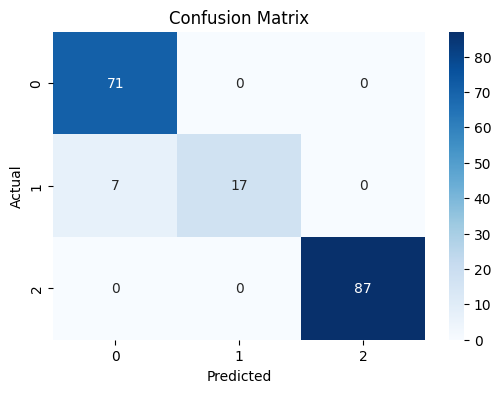

In [74]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize it
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#Classification report


In [75]:
from sklearn.metrics import classification_report

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Classification Report:
              precision    recall  f1-score   support

     At Risk       0.91      1.00      0.95        71
Malnourished       1.00      0.71      0.83        24
      Normal       1.00      1.00      1.00        87

    accuracy                           0.96       182
   macro avg       0.97      0.90      0.93       182
weighted avg       0.96      0.96      0.96       182



In [76]:
from collections import Counter
print(Counter(y_train))


Counter({2: 384, 0: 272, 1: 72})


In [77]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


# Apply SMOTE only to training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Optional: Check class distribution
print(Counter(y_train_resampled))


Counter({2: 384, 0: 384, 1: 384})


#Random forest,confusion matrix


              precision    recall  f1-score   support

           0      0.972     0.972     0.972        71
           1      0.917     0.917     0.917        24
           2      1.000     1.000     1.000        87

    accuracy                          0.978       182
   macro avg      0.963     0.963     0.963       182
weighted avg      0.978     0.978     0.978       182



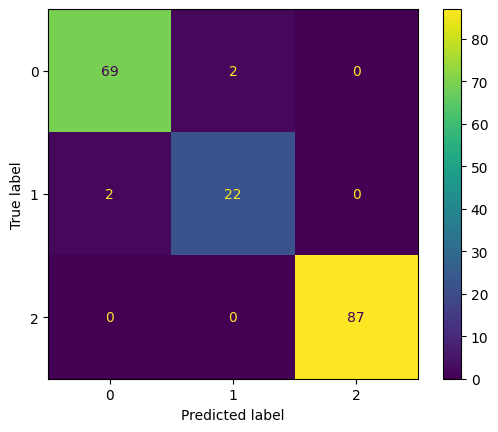

In [78]:
# 3. Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

# 4. Predict and evaluate
y_pred = rf.predict(X_test)

# 5. Print metrics
print(classification_report(y_test, y_pred, digits=3))

from sklearn.metrics import ConfusionMatrixDisplay


# 6. Visualize confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [85]:
import joblib

# Save your trained model
joblib.dump(rf_model, 'malnutrition_rf_model.pkl')

joblib.dump(le, 'encoder.pkl')


['encoder.pkl']

In [92]:
import pandas as pd
import joblib

# Load trained model
rf_model = joblib.load('malnutrition_rf_model.pkl')

# Example input with raw values
new_data = pd.DataFrame([{
    'age_months': 44,
    'gender': 'Male',
    'weight_kg': 12.4,
    'height_cm': 89.4,
    'muac_cm': 14.6,
    'recent_illness': 0,
    'immunization_status': 'Partial'
}])

# One-hot encode using same logic as training
new_data_encoded = pd.get_dummies(new_data, columns=["gender", "immunization_status"], drop_first=True)

# Define the exact columns expected by the model (based on training)
expected_features = [
    'age_months', 'weight_kg', 'height_cm', 'muac_cm', 'recent_illness',
    'gender_Male', 'immunization_status_Partial'
]

# Add any missing columns
for col in expected_features:
    if col not in new_data_encoded.columns:
        new_data_encoded[col] = 0

# Reorder to match the model
new_data_encoded = new_data_encoded[expected_features]

# Predict
prediction = rf_model.predict(new_data_encoded)
print("Predicted Class:", prediction[0])


Predicted Class: 2
